In [3]:
import subprocess
import os
import warnings
warnings.filterwarnings('ignore')
os.chdir(subprocess.getoutput("git rev-parse --show-toplevel"))
%matplotlib inline

In [9]:
from src import get_data, preprocess, shape_utility
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# S&P500 daily stock value get and watch
* what's S&P500?: http://www.investopedia.com/terms/s/sp500.asp

In [5]:
panel = get_data.symbols2daily_values(kinds='sandp500')
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 1780 (major_axis) x 504 (minor_axis)
Items axis: Open to Adj Close
Major_axis axis: 2010-01-04 00:00:00 to 2017-01-27 00:00:00
Minor_axis axis: A to ZTS

* dim-1: key(item axis)

In [6]:
panel.items

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

* dim-2: date index(monday-friday during 2010~2016)

In [7]:
panel.major_axis

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
               '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
               '2017-01-26', '2017-01-27'],
              dtype='datetime64[ns]', name='Date', length=1780, freq=None)

* dim-3: enterprise lists (S&P500 symbols)

In [8]:
panel.minor_axis

Index(['A', 'AA', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE',
       ...
       'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YHOO', 'YUM', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=504)

# preprocessing

* notation
    * $t$: time index
    * $i$: enterprise symbols index
    * $x_{t,i}$: $i$-th enterprise adj close (conitinuation) value at time $t$ 
* to note change rate,
    * drop enterprise includes missing value
    * change rate: $c_{t,i} \leftarrow \log x_{t,i} - \log x_{t-1,i}$ 

* all $c_{t,i}$ stats

In [10]:
adj_value = preprocess.filter_key_nan(panel, key='Adj Close')
pd.DataFrame(shape_utility.np1(adj_value), columns=['all change rate stats']).describe()

,all change rate stats
count,832572.000000
mean,0.000514
std,0.017712
min,-0.497378
25%,-0.007713
50%,0.000639
75%,0.009030
max,0.481849


* mean, variance distribution

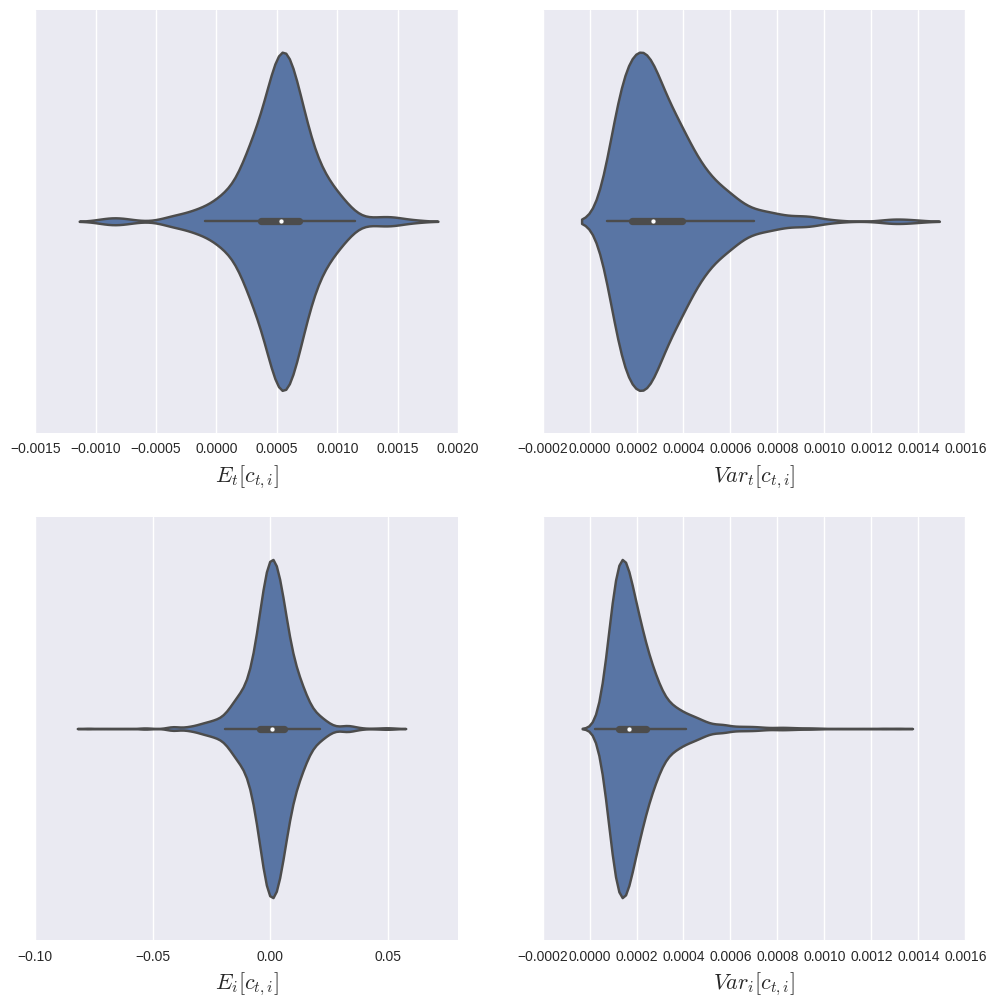

In [11]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
plt.figure(figsize=(12, 12))
plt.subplot(221)
sns.violinplot(adj_value.mean(axis=0))
plt.xlabel('$E_t[c_{t,i}]$', fontsize=16)
plt.subplot(222)
sns.violinplot(adj_value.var(axis=0))
plt.xlabel('$Var_t[c_{t,i}]$', fontsize=16)
plt.subplot(223)
sns.violinplot(adj_value.mean(axis=1))
plt.xlabel('$E_i[c_{t,i}]$', fontsize=16)
plt.subplot(224)
sns.violinplot(adj_value.var(axis=1))
plt.xlabel('$Var_i[c_{t,i}]$', fontsize=16)


* feature and label set